In [1]:
#Importo la libreria os para poder moverme en mi sistema operativo
import os
os.listdir('.') #el "." representa el lugar de trabajo actual

['.ipynb_checkpoints', 'data', 'exploracion.ipynb', 'Keras_baseline.ipynb']

In [4]:
PATH='data' #path es un nombre comun que usan para referirse a una carpeta donde trabajan
os.listdir(PATH) #Con esto en mi carpeta de trabajo del entorno abro la carpeta PATH

['jpeg224',
 'sample_submission.csv',
 'subset.csv',
 'test.csv',
 'train.csv',
 'train_split.csv',
 'val_split.csv']

In [5]:
import pandas as pd
train =pd.read_csv(f'{PATH}/train.csv') #el f es como el format pero abreviado
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
imgs=os.listdir(f'{PATH}/jpeg224/train') #Con esto capturo los nombres de cada imagen y lo paso a una lista
imgs[:5]

['ISIC_0015719.jpg',
 'ISIC_0052212.jpg',
 'ISIC_0068279.jpg',
 'ISIC_0074268.jpg',
 'ISIC_0074311.jpg']

In [7]:
test=pd.read_csv(f'{PATH}/test.csv')
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [8]:
sub=pd.read_csv(f'{PATH}/sample_submission.csv')
sub.head()

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0


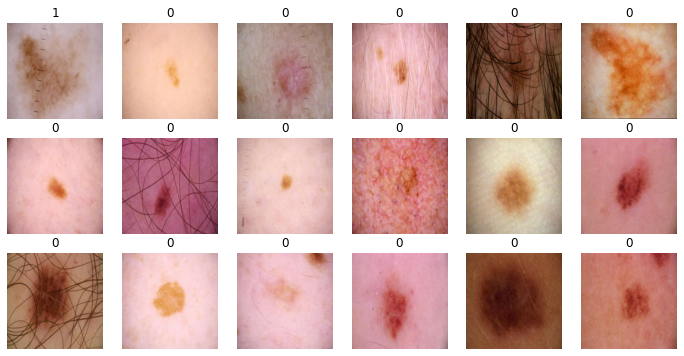

In [9]:
import matplotlib.pyplot as plt
from skimage import io
import random


r,c = 3,6 
fig=plt.figure(figsize=(2*c,2*r)) #Tamaño del la figura
for _r in range(r):
    for _c in range(c):
        plt.subplot(r,c,_r*c+_c+1) #filas columnas y posicion
        ix=random.randint(0,len(imgs)-1)
        name=train["image_name"].values[ix]#con esto escogemos una imagen random
        img=io.imread(f'{PATH}/jpeg224/train/{name}.jpg')
        plt.imshow(img)#plt le cargo las imagenes
        plt.axis(False)#con esto le retiro los ejes
        label=train["target"].values[ix]
        plt.title(label)
plt.show()#muestro el grafico

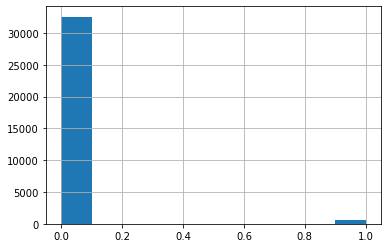

In [16]:
train["target"].hist() #hay pocos de la clase 1 no esta balanceado
#la solucion que comenta es que se puede usar dataaumentation o al momento de hacer
#los bach siempre asegurarme de darle el 2% con categoria 1

In [17]:
train["target"].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [18]:
1-584/32542 #En este caso la presicion de solo 0 es de 98 x lo que tenemos que ver otras metricas

0.9820539610349702

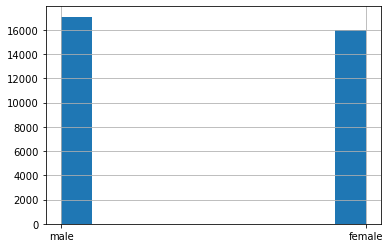

In [19]:
train["sex"].hist()

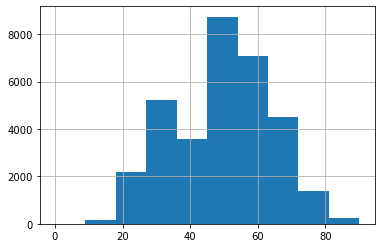

In [20]:
train["age_approx"].hist()

In [21]:
train["age_approx"].value_counts()

45.0    4466
50.0    4270
55.0    3824
40.0    3576
60.0    3240
35.0    2850
65.0    2527
30.0    2358
70.0    1968
25.0    1544
75.0     981
20.0     655
80.0     419
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64

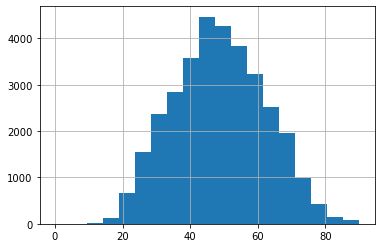

In [22]:
train["age_approx"].hist(bins=len(train["age_approx"].unique()))

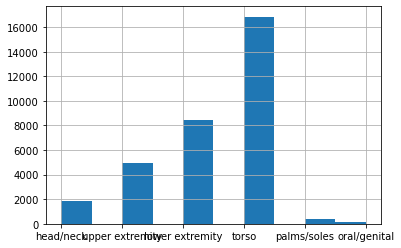

In [23]:
train["anatom_site_general_challenge"].hist()

In [24]:
train["anatom_site_general_challenge"].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [25]:
train.shape,test.shape #El numero de datos en train y test

((33126, 8), (10982, 5))

In [26]:
from sklearn.model_selection import train_test_split
train_split,val_split=train_test_split(train,test_size=0.33,shuffle=True,random_state=42,stratify=train["target"])
#a los datos de train los voy a dividir en 2 y val_split va a tener el 33% de las imagenes de train
#stratify hace que el balanceo de una columna sea igual el los split
train_split.shape,val_split.shape

((22194, 8), (10932, 8))

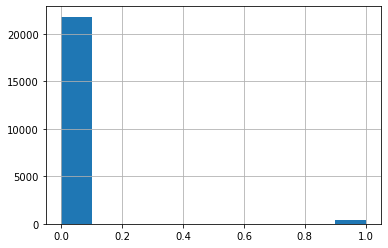

In [29]:
train_split["target"].hist()

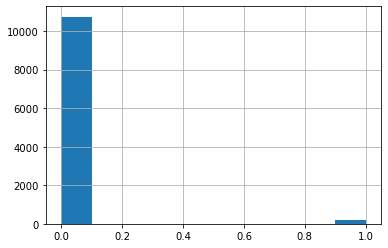

In [30]:
val_split["target"].hist()

In [35]:
_,subset=train_test_split(train_split,test_size=0.1,shuffle=True,random_state=42,stratify=train_split["target"])
#a los datos de train los voy a dividir en 2 y val_split va a tener el 10% de las imagenes de train
#stratify hace que el balanceo de una columna sea igual el los split
subset.shape

((2220, 8), (19974, 8))

In [39]:
train_split.to_csv(f'{PATH}/train_split.csv',index=False)
val_split.to_csv(f'{PATH}/val_split.csv',index=False)
subset.to_csv(f'{PATH}/subset.csv',index=False)

In [40]:
os.listdir(PATH)

['jpeg224',
 'sample_submission.csv',
 'subset.csv',
 'test.csv',
 'train.csv',
 'train_split.csv',
 'val_split.csv']